In [14]:
import pandas as pd
import numpy as np
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')

In [2]:
# laod data
file_name = 'clean_BE_df.parquet'

data = pd.read_parquet(file_name)

print(data.columns)
print(data.dtypes)

Index(['Pieces', 'Minifigs', 'Retail', 'Value', 'LEGO', 'Amazon', 'Bricklink',
       'StockX', 'eBay', 'Exclusive', 'Promotional', 'Years'],
      dtype='object')
Pieces         float64
Minifigs         int32
Retail         float64
Value          float64
LEGO             int64
Amazon           int64
Bricklink        int64
StockX           int64
eBay             int64
Exclusive        int64
Promotional      int64
Years            int64
dtype: object


In [3]:
cols = data.columns
cols = [_ for _ in cols if _ != 'Value']
# cols = ['Amazon', 'Bricklink', 'LEGO', 'Minifigs', 'Promotional', 'Retail', 'StockX', 'Years']
X = data[cols]

y = np.log(data['Value'])

In [4]:
from MCMC_bayes_model import Prior, MCMCposterior

prior = Prior(y, X)
a = prior.calc_a()
# a = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
C = prior.calc_C()
# C = np.diag([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001])

In [5]:
posterior = MCMCposterior(y, X, 2000, 5000, a, C, 0.001, 0.001)
posterior.gibbs_sampling()

In [6]:
posterior.traceplot(clear=True, all_virables=True, include_tau=True)
posterior.histogram(clear=True, all_virables=True, include_tau=True)
posterior.acf(clear=True, all_virables=True, include_tau=True)
posterior.ergodic_mean(all_virables=True, include_tau=True)
posterior.ergodic_stand_mean(all_virables=True, include_tau=True)

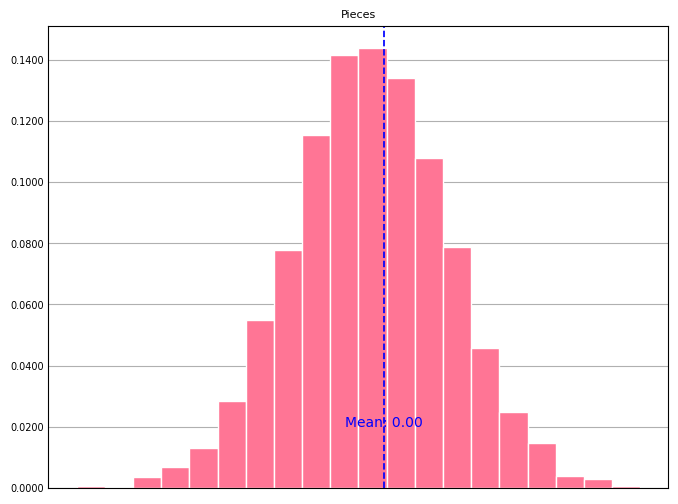

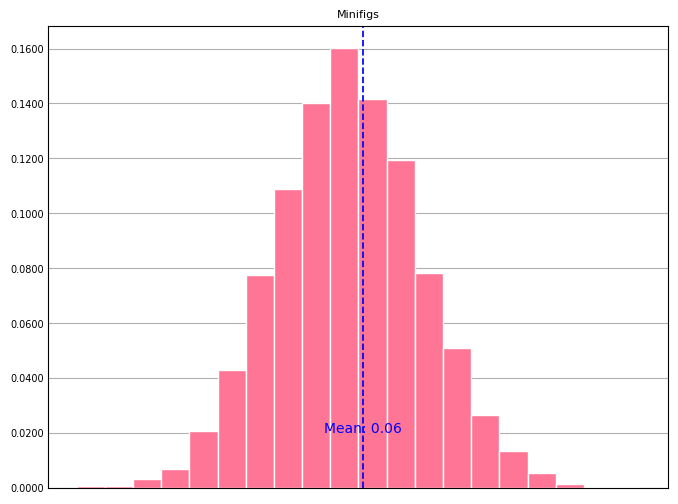

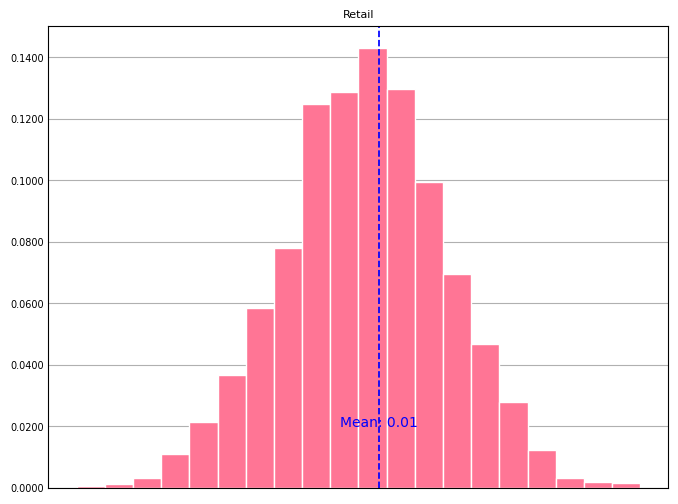

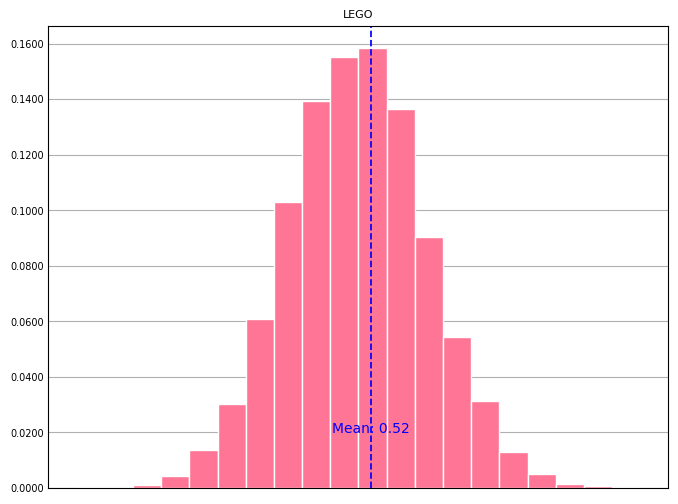

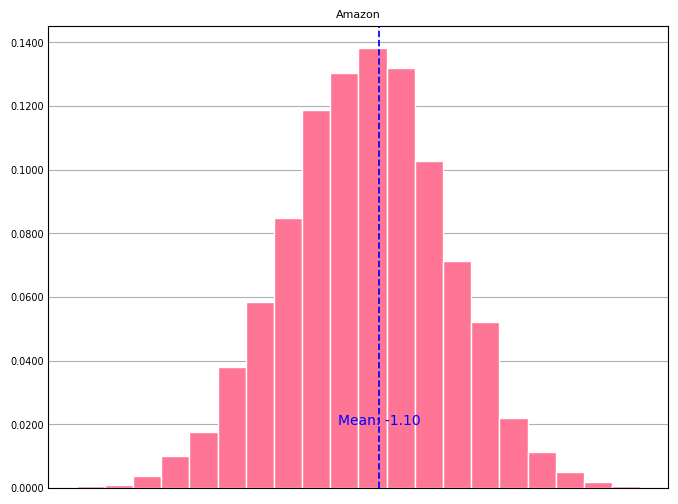

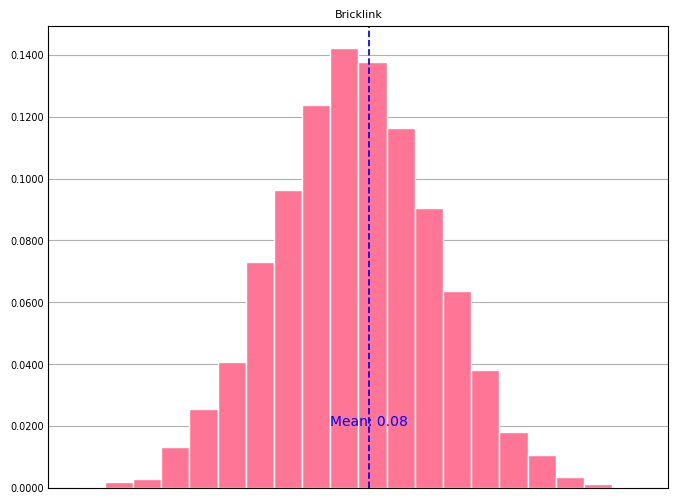

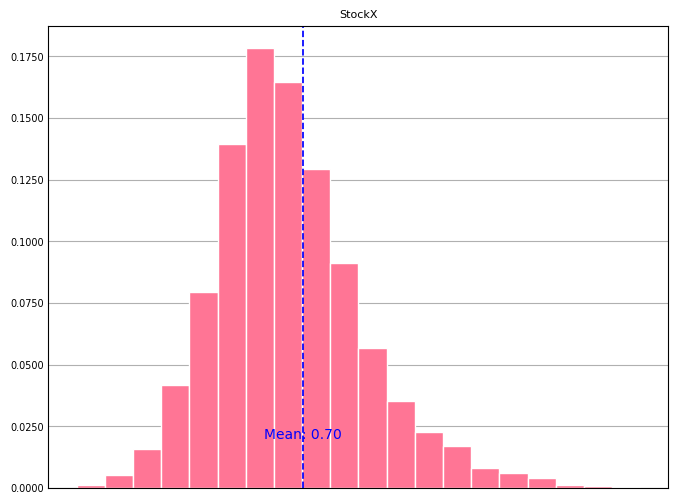

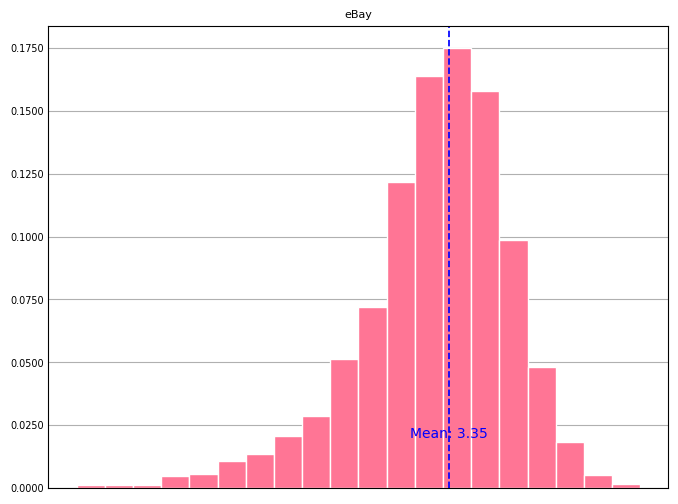

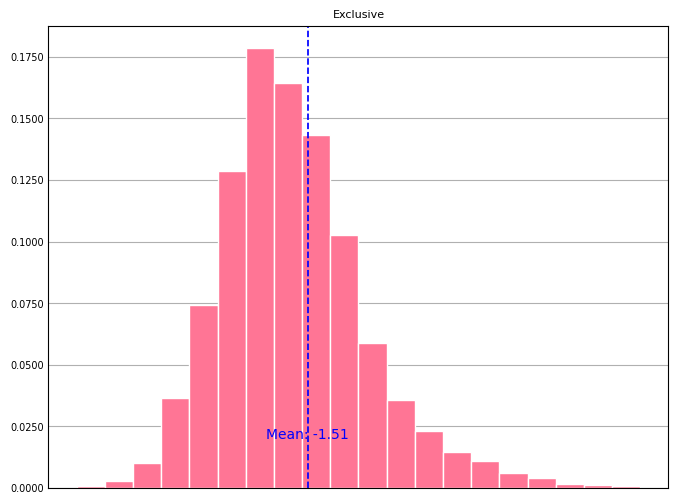

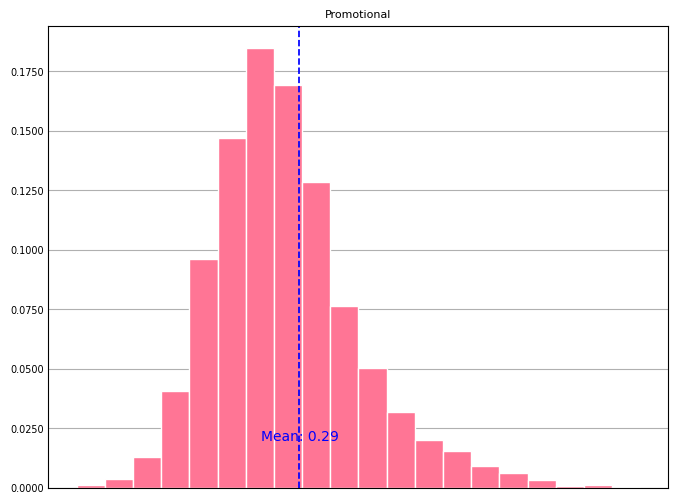

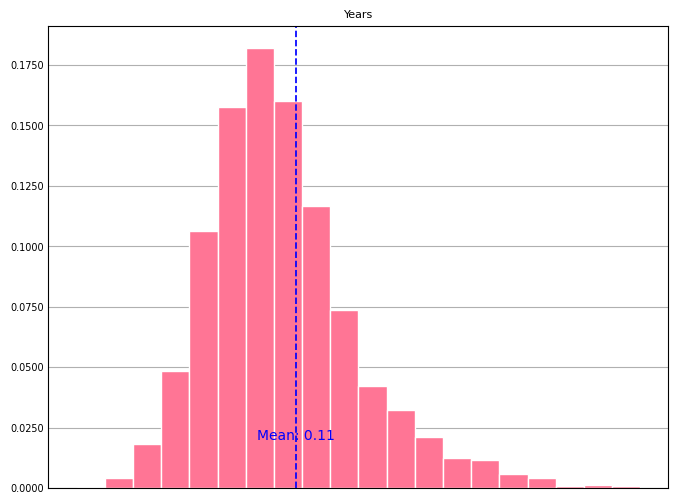

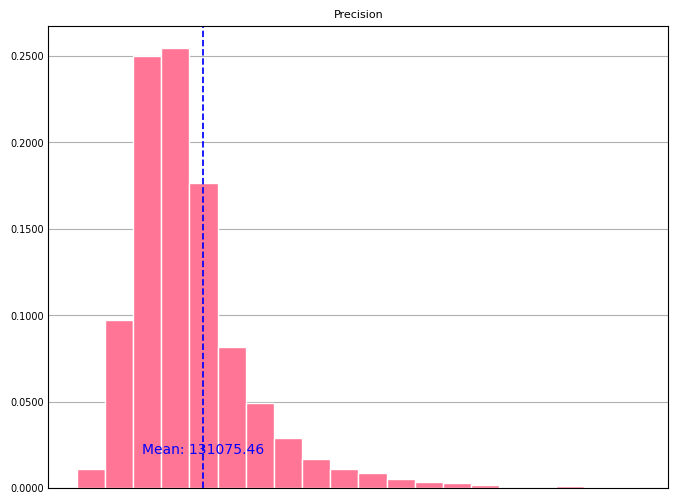

In [7]:
for plot in posterior.histograms:
    display(plot)

In [8]:
posterior.describe_posterior()

,Pieces,Minifigs,Retail,LEGO,Amazon,Bricklink,StockX,eBay,Exclusive,Promotional,Years,Precision
Mean,8.659790e-05,6.091640e-02,5.747480e-03,5.203991e-01,-1.096639e+00,8.203543e-02,7.023021e-01,3.351340,-1.514173,0.288679,1.064824e-01,1.310755e+05
Variance,5.029470e-08,1.030092e-07,5.600159e-07,4.237840e-07,3.259203e-07,1.122377e-07,5.115501e-07,0.000001,0.000016,0.000001,2.029112e-09,2.187660e+08
Standard Deviation,2.242648e-04,3.209504e-04,7.483421e-04,6.509870e-04,5.708943e-04,3.350190e-04,7.152273e-04,0.001024,0.004031,0.001056,4.504567e-05,1.479074e+04
Median,8.729206e-05,6.091208e-02,5.756255e-03,5.203965e-01,-1.096627e+00,8.203173e-02,7.022152e-01,3.351467,-1.514615,0.288548,1.064762e-01,1.278002e+05
Mode,-7.659556e-04,5.971156e-02,3.075554e-03,5.177393e-01,-1.098703e+00,8.086144e-02,7.002400e-01,3.346427,-1.526171,0.285636,1.063579e-01,1.036470e+05
Credibility Interval Lower,8.038109e-05,6.090751e-02,5.726735e-03,5.203811e-01,-1.096655e+00,8.202615e-02,7.022822e-01,3.351312,-1.514285,0.288650,1.064811e-01,1.306654e+05
Credibility Interval Upper,9.281471e-05,6.092530e-02,5.768224e-03,5.204172e-01,-1.096623e+00,8.204472e-02,7.023219e-01,3.351368,-1.514062,0.288709,1.064836e-01,1.314855e+05
HDP Lower,-3.509948e-04,6.028261e-02,4.313405e-03,5.191452e-01,-1.097765e+00,8.135232e-02,7.009896e-01,3.349150,-1.521552,0.286851,1.063998e-01,1.084350e+05
HDP upper,5.291790e-04,6.153806e-02,7.218521e-03,5.217041e-01,-1.095544e+00,8.266630e-02,7.038462e-01,3.353210,-1.505736,0.291037,1.065768e-01,1.604842e+05


In [1]:
import os

os.environ['R_HOME'] = 'C:/Users/macie/anaconda3/envs/myrrun/lib/R'
%load_ext rpy2.ipython


c:\Users\macie\anaconda3\envs\myrrun\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [3]:
%%R
# install.packages("openxlsx")
# install.packages("MASS")
# install.packages("coda")
# install.packages("MCMCpack")
library(openxlsx)
library(MASS)
library(MCMCpack)
library(coda)

In [4]:
%%R

getwd()
setwd('C:/Users/macie/Desktop/Studia/Wnioskowanie Bayesowskie/projekt/bayesian_regression')

my_data <- read.xlsx("clean_BE_df.xlsx", sheet=1, startRow = 1, colNames = TRUE, rowNames = FALSE,
                            detectDates = FALSE)

calc_a <- function(X) {
  a <- colMeans(X)
  return(matrix(a, ncol = 1))
}
calc_C <- function(X) {
  vars <- apply(X, 2, var) 
  C <- vars
  C <- diag(C)
  C <- solve(C)
  return(C)
}

data <- my_data[,-c(1)]
data['Value'] <- log(data['Value'])
str(data)

a <- calc_a(data)
C <- calc_C(data)

print(a)
print(C)

'data.frame':	722 obs. of  12 variables:
 $ Pieces     : num  382 1394 1056 599 679 ...
 $ Minifigs   : num  5 4 5 4 3 4 4 4 1 0 ...
 $ Retail     : num  55 160 110 80 70 ...
 $ Value      : num  4.01 5.08 4.48 4.38 4.33 ...
 $ LEGO       : num  1 1 0 1 0 0 0 0 0 0 ...
 $ Amazon     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Bricklink  : num  0 0 0 0 1 1 1 1 0 0 ...
 $ StockX     : num  0 1 1 1 1 0 1 0 0 1 ...
 $ eBay       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Exclusive  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Promotional: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Years      : num  1 2 2 2 3 6 9 9 9 6 ...
              [,1]
 [1,] 4.718629e+02
 [2,] 2.975069e+00
 [3,] 5.380639e+01
 [4,] 4.536507e+00
 [5,] 6.925208e-02
 [6,] 8.878116e-01
 [7,] 7.008310e-01
 [8,] 5.332410e-01
 [9,] 9.889197e-01
[10,] 5.540166e-03
[11,] 1.288089e-01
[12,] 1.069114e+01
              [,1]       [,2]         [,3]      [,4]     [,5]     [,6]     [,7]
 [1,] 1.783487e-06 0.00000000 0.0000000000 0.0000000  0.00000  0.00000 0.000000
 [2,] 0.

In [5]:
%%R

cols <- colnames(data)
cols <- cols[-4]

colnames_list <- list()

for (i in 1:100) {
  number_of_cols <- sample(4:10, 1)
  
  selected_columns <- sample(cols, number_of_cols)
  selected_columns <- append(selected_columns, 'Value')
  selected_columns <- sort(selected_columns)

  colnames_list[[i]] <- selected_columns
}

colnames_list <- colnames_list[!duplicated(sapply(colnames_list, function(x) paste(sort(x), collapse = ",")))]
colnames_list <- append(colnames_list, list(colnames(data)))

print(length(colnames_list))
print(colnames_list)

[1] 88


[[1]]
[1] "Amazon"      "Bricklink"   "Exclusive"   "Promotional" "Value"      

[[2]]
 [1] "Amazon"      "eBay"        "Exclusive"   "LEGO"        "Minifigs"   
 [6] "Pieces"      "Promotional" "Retail"      "StockX"      "Value"      
[11] "Years"      

[[3]]
[1] "Amazon"      "Bricklink"   "eBay"        "Exclusive"   "LEGO"       
[6] "Promotional" "Value"      

[[4]]
 [1] "Amazon"      "Bricklink"   "eBay"        "Exclusive"   "LEGO"       
 [6] "Minifigs"    "Pieces"      "Promotional" "Retail"      "Value"      
[11] "Years"      

[[5]]
[1] "Amazon"      "Minifigs"    "Pieces"      "Promotional" "Retail"     
[6] "StockX"      "Value"      

[[6]]
 [1] "Bricklink"   "eBay"        "Exclusive"   "LEGO"        "Minifigs"   
 [6] "Pieces"      "Promotional" "Retail"      "StockX"      "Value"      
[11] "Years"      

[[7]]
[1] "Amazon"      "Exclusive"   "Promotional" "Value"       "Years"      

[[8]]
[1] "Amazon"    "Bricklink" "eBay"      "LEGO"      "Minifigs"  "Pieces"   
[7

In [6]:
%%R
print(str(data))
print(length(colnames_list))

calc_a <- function(X) {
  a <- colMeans(X)
  return(matrix(a, ncol = 1))
}
calc_C <- function(X) {
  vars <- apply(X, 2, var) 
  C <- vars
  C <- diag(C)
  C <- solve(C)
  return(C)
}

logmarglike_list <- list()

for (i in 1:length(colnames_list)) {
  current_colnames <- colnames_list[[i]]
  temp_data <- data[current_colnames]

  a <- calc_a(temp_data)
  C <- calc_C(temp_data)

  posterior <- MCMCregress(
    Value ~ .,
    data = temp_data, burnin = 2000, mcmc = 5000, thin = 1,
    verbose = 0, b0 = a, B0 = C,
    c0 = 0.001, d0 = 0.01,
    marginal.likelihood = c('Chib95')
  )

  logmarglike <- attr(posterior, 'logmarglike')
  logmarglike_list <- append(logmarglike_list, logmarglike)
  print(logmarglike)
}


'data.frame':	722 obs. of  12 variables:
 $ Pieces     : num  382 1394 1056 599 679 ...
 $ Minifigs   : num  5 4 5 4 3 4 4 4 1 0 ...
 $ Retail     : num  55 160 110 80 70 ...
 $ Value      : num  4.01 5.08 4.48 4.38 4.33 ...
 $ LEGO       : num  1 1 0 1 0 0 0 0 0 0 ...
 $ Amazon     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Bricklink  : num  0 0 0 0 1 1 1 1 0 0 ...
 $ StockX     : num  0 1 1 1 1 0 1 0 0 1 ...
 $ eBay       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Exclusive  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Promotional: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Years      : num  1 2 2 2 3 6 9 9 9 6 ...
NULL
[1] 88
[1] -1324.882
[1] -1129.374
[1] -1324.109
[1] -1126.353
[1] -1230.192
[1] -1114.226
[1] -1232.21
[1] -1081.906
[1] -1077.115
[1] -1086.636
[1] -1095.099
[1] -1231.005
[1] -1109.291
[1] -1068.797
[1] -1238.605
[1] -1113.84
[1] -1217.817
[1] -1269.118
[1] -1099.589
[1] -1090.92
[1] -1178.914
[1] -1127.582
[1] -1242.972
[1] -1102.486
[1] -1212.244
[1] -1213.02
[1] -1073.824
[1] -1133.788
[1] -1218.031
[

In [8]:
%%R

models_specification <- colnames_list
logmarglike_vector <- sapply(logmarglike_list, function(x) x[[1]])

df <- data.frame(
  models_specification = sapply(models_specification, function(x) paste(x, collapse = ", ")),
  logmarglike = logmarglike_vector
)

df <-  df[order(df['logmarglike'], decreasing = TRUE), ]
row.names(df) <- NULL

In [ ]:
%%R
print(BF)

              [,1]         [,2]         [,3]         [,4]         [,5]
 [1,] 1.000000e+00 1.395706e+00 2.464659e+03 1.926050e+04 2.166866e+05
 [2,] 7.164834e-01 1.000000e+00 1.765887e+03 1.379983e+04 1.552524e+05
 [3,] 4.057356e-04 5.662876e-04 1.000000e+00 7.814671e+00 8.791748e+01
 [4,] 5.191973e-05 7.246467e-05 1.279644e-01 1.000000e+00 1.125031e+01
 [5,] 4.614960e-06 6.441126e-06 1.137430e-02 8.888643e-02 1.000000e+00
 [6,] 2.661217e-06 3.714276e-06 6.558992e-03 5.125637e-02 5.766501e-01
 [7,] 9.906020e-08 1.382589e-07 2.441496e-04 1.907949e-03 2.146502e-02
 [8,] 8.222338e-10 1.147597e-09 2.026526e-06 1.583664e-05 1.781671e-04
 [9,] 7.088623e-10 9.893632e-10 1.747104e-06 1.365304e-05 1.536010e-04
[10,] 6.862266e-10 9.577705e-10 1.691315e-06 1.321707e-05 1.486961e-04
              [,6]         [,7]         [,8]         [,9]        [,10]
 [1,] 3.757680e+05 1.009487e+07 1.216199e+09 1.410711e+09 1.457245e+09
 [2,] 2.692315e+05 7.232808e+06 8.713864e+08 1.010751e+09 1.044091e+09
 [3,] 

: 

In [ ]:
%%R
# it is not correct models comparing
df_top <- df[1:10, ]

loglike <- df_top[,'logmarglike']

BF <- exp(outer(loglike, loglike, "-"))
P <- BF / rowSums(BF)
model_probabilities <- P[, 1]
df_top['prior_probabilities'] = (1 / length(model_probabilities))

df_top['model_probabilities'] <- model_probabilities
df_top['posterior_probabilities'] <- df_top['prior_probabilities'] * df_top['model_probabilities'] / sum(df_top['prior_probabilities'] * df_top['model_probabilities'])

print(df_top)

                                                                                    models_specification
1                           Amazon, Bricklink, LEGO, Minifigs, Promotional, Retail, StockX, Value, Years
2  Pieces, Minifigs, Retail, Value, LEGO, Amazon, Bricklink, StockX, eBay, Exclusive, Promotional, Years
3                                        Amazon, Bricklink, eBay, Minifigs, Retail, StockX, Value, Years
4                           Amazon, Bricklink, LEGO, Minifigs, Pieces, Promotional, StockX, Value, Years
5                     Amazon, Bricklink, eBay, LEGO, Minifigs, Promotional, Retail, StockX, Value, Years
6                                                    Minifigs, Pieces, Promotional, StockX, Value, Years
7              Amazon, Bricklink, Exclusive, Minifigs, Pieces, Promotional, Retail, StockX, Value, Years
8                                  Amazon, Bricklink, eBay, LEGO, Minifigs, Pieces, StockX, Value, Years
9                                          Amazon, Bric

In [16]:
%%R

cols <- c('Amazon', 'Bricklink', 'LEGO', 'Minifigs', 'Promotional', 'Retail', 'StockX', 'Value', 'Years')
test_data <- data[,cols]

calc_a <- function(X) {
  a <- colMeans(X)
  return(matrix(a, ncol = 1))
}
calc_C <- function(X) {
  vars <- apply(X, 2, var) 
  C <- vars
  C <- diag(C)
  C <- solve(C)
  return(C)
}
a <- calc_a(test_data)
C <- calc_C(test_data)


posterior <- MCMCregress(
    Value ~ .,
    data = test_data, burnin = 2000, mcmc = 5000, thin = 1,
    verbose = 0, b0 = a, B0 = C,
    c0 = 0.001, d0 = 0.01,
    marginal.likelihood = c('Chib95')
  )

summary(posterior)


Iterations = 2001:7000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                 Mean        SD  Naive SE Time-series SE
(Intercept)  2.943418 0.1431126 2.024e-03      2.024e-03
Amazon      -0.744728 0.1193026 1.687e-03      1.742e-03
Bricklink    0.102049 0.0777247 1.099e-03      1.039e-03
LEGO         0.516046 0.1588924 2.247e-03      2.108e-03
Minifigs     0.067262 0.0129415 1.830e-04      1.868e-04
Promotional  0.147720 0.1215300 1.719e-03      1.719e-03
Retail       0.005867 0.0004822 6.819e-06      6.819e-06
StockX       0.717164 0.0826579 1.169e-03      1.169e-03
Years        0.112612 0.0058112 8.218e-05      8.214e-05
sigma2       0.907912 0.0493641 6.981e-04      7.984e-04

2. Quantiles for each variable:

                 2.5%       25%      50%       75%     97.5%
(Intercept)  2.661052  2.846632  2.94488  3.038171  3.220202
Amazon      -0.97853

In [15]:
%R print(BF)

              [,1]         [,2]         [,3]         [,4]         [,5]
 [1,] 1.000000e+00 1.395706e+00 2.464659e+03 1.926050e+04 2.166866e+05
 [2,] 7.164834e-01 1.000000e+00 1.765887e+03 1.379983e+04 1.552524e+05
 [3,] 4.057356e-04 5.662876e-04 1.000000e+00 7.814671e+00 8.791748e+01
 [4,] 5.191973e-05 7.246467e-05 1.279644e-01 1.000000e+00 1.125031e+01
 [5,] 4.614960e-06 6.441126e-06 1.137430e-02 8.888643e-02 1.000000e+00
 [6,] 2.661217e-06 3.714276e-06 6.558992e-03 5.125637e-02 5.766501e-01
 [7,] 9.906020e-08 1.382589e-07 2.441496e-04 1.907949e-03 2.146502e-02
 [8,] 8.222338e-10 1.147597e-09 2.026526e-06 1.583664e-05 1.781671e-04
 [9,] 7.088623e-10 9.893632e-10 1.747104e-06 1.365304e-05 1.536010e-04
[10,] 6.862266e-10 9.577705e-10 1.691315e-06 1.321707e-05 1.486961e-04
              [,6]         [,7]         [,8]         [,9]        [,10]
 [1,] 3.757680e+05 1.009487e+07 1.216199e+09 1.410711e+09 1.457245e+09
 [2,] 2.692315e+05 7.232808e+06 8.713864e+08 1.010751e+09 1.044091e+09
 [3,] 

array([[1.00000000e+00, 1.39570581e+00, 2.46465901e+03, 1.92605003e+04,
        2.16686622e+05, 3.75767960e+05, 1.00948721e+07, 1.21619903e+09,
        1.41071131e+09, 1.45724455e+09],
       [7.16483370e-01, 1.00000000e+00, 1.76588720e+03, 1.37998282e+04,
        1.55252361e+05, 2.69231494e+05, 7.23280798e+06, 8.71386379e+08,
        1.01075120e+09, 1.04409149e+09],
       [4.05735639e-04, 5.66287588e-04, 1.00000000e+00, 7.81467142e+00,
        8.79174849e+01, 1.52462453e+02, 4.09584938e+03, 4.93455291e+05,
        5.72375857e+05, 5.91256049e+05],
       [5.19197312e-05, 7.24646703e-05, 1.27964433e-01, 1.00000000e+00,
        1.12503111e+01, 1.95097715e+01, 5.24123046e+02, 6.31447267e+04,
        7.32437522e+04, 7.56597453e+04],
       [4.61495958e-06, 6.44112589e-06, 1.13743017e-02, 8.88864306e-02,
        1.00000000e+00, 1.73415395e+00, 4.65874267e+01, 5.61270936e+03,
        6.51037570e+03, 6.72512469e+03],
       [2.66121678e-06, 3.71427571e-06, 6.55899192e-03, 5.12563667e-02,
   